In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


In [7]:
# List for holding lat_lngs and cities
latitude_longitude = []
cities_list = []

# Create a set of random lat and lng combinations
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)
latitude_longitude = zip(latitude, longitude)

# Identify nearest city for each lat, lng combination
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
lats

array([ 76.89064632,  13.00481786,  29.08538245, ...,  62.16364569,
        76.77467928, -23.21997205])

In [10]:
# Starting URL for Weather Map API Call
baseurl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

for city in cities:
        
    city_url = baseurl + "&q=" + city
    
    try:
        
        city_weather = requests.get(city_url).json()

        
        city_lats = city_weather["coord"]["lat"]
        city_lngs = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    except:
        print("Skipping city...")
        pass
              

print("Finished")

        
        

Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city...
Skipping city.

In [20]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv('cityfile.csv', index_label="City_ID")

# Show Record Count
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dikson,100,RU,1577132765,93,73.51,80.55,0.84,14.14
1,coahuayana,0,MX,1577132765,34,18.62,-100.35,90.39,3.27
2,naze,61,NG,1577132765,69,5.43,7.07,75.20,4.65
3,cape town,0,ZA,1577132762,77,-33.93,18.42,64.99,9.17
4,rikitea,100,PF,1577132765,81,-23.12,-134.97,74.73,10.83


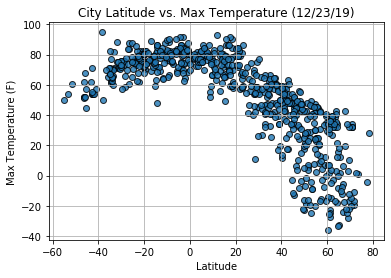

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

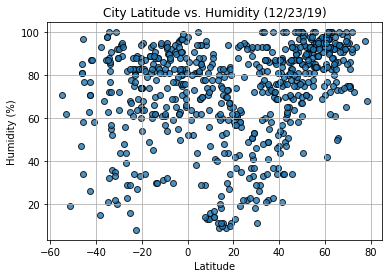

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

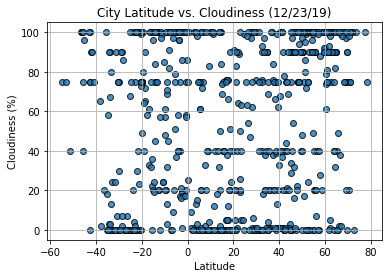

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

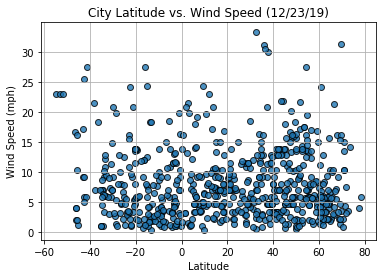

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()